타겟 <dev>

| 품목명         | 품종명         | 거래단위     | 등급   |
| -------------- | -------------- | ------------ | ------ |
| 건고추         | 화건           | 30 kg        | 상품   |
| 사과           | 홍로, 후지     | 10 개        | 상품   |
| 감자           | 감자 수미      | 20키로상자   | 상     |
| 배             | 신고           | 10 개        | 상품   |
| 깐마늘(국산)  | 깐마늘(국산)  | 20 kg        | 상품   |
| 무             | 무             | 20키로상자   | 상     |
| 상추           | 청             | 100 g        | 상품   |
| 배추           | 배추           | 10키로망대   | 상     |
| 양파           | 양파           | 1키로        | 상     |
| 대파           | 대파(일반)     | 1키로단      | 상     |


# 1. 파생변수 추가 생성

In [42]:
import pandas as pd
df = pd.read_csv('./open/train/train.csv')


## 1. 년, 달, 순

In [43]:
import numpy as np

df['year'] = df['시점'].str[:4].astype(int)
df['month'] = df['시점'].str[4:6].astype(int)
df['순'] = df['시점'].str[6:8]
df = df[['year', 'month', '순'] + [col for col in df.columns if col not in ['year', 'month', '순']]]

print("\nDataFrame after extracting 'year', 'month', and '순':")
print(df)


DataFrame after extracting 'year', 'month', and '순':
       year  month   순        시점  품목명     품종명    거래단위  등급     평년 평균가격(원)  \
0      2018      1  상순  201801상순  건고추      화건   30 kg  상품  381666.666667   
1      2018      1  중순  201801중순  건고추      화건   30 kg  상품  380809.666667   
2      2018      1  하순  201801하순  건고추      화건   30 kg  상품  380000.000000   
3      2018      2  상순  201802상순  건고추      화건   30 kg  상품  380000.000000   
4      2018      2  중순  201802중순  건고추      화건   30 kg  상품  376666.666667   
...     ...    ...  ..       ...  ...     ...     ...  ..            ...   
29371  2021     11  중순  202111중순   대파  대파(일반)  10키로묶음   상       0.000000   
29372  2021     11  하순  202111하순   대파  대파(일반)  10키로묶음   상       0.000000   
29373  2021     12  상순  202112상순   대파  대파(일반)  10키로묶음   상       0.000000   
29374  2021     12  중순  202112중순   대파  대파(일반)  10키로묶음   상       0.000000   
29375  2021     12  하순  202112하순   대파  대파(일반)  10키로묶음   상       0.000000   

        평균가격(원)  
0      590000.0

## 2. 계절

In [44]:
def get_season(month):
    if month in [3, 4, 5]:
        return '봄'  
    elif month in [6, 7, 8]:
        return '여름'  
    elif month in [9, 10, 11]:
        return '가을'  
    elif month in [12, 1, 2]:
        return '겨울'  
    else:
        return np.nan 
df['계절'] = df['month'].apply(get_season)
df['month'] = df['month'].astype(int).astype(str).str.zfill(2)

In [45]:
df

,year,month,순,시점,품목명,품종명,거래단위,등급,평년 평균가격(원),평균가격(원),계절
0,2018,01,상순,201801상순,건고추,화건,30 kg,상품,381666.666667,590000.0,겨울
1,2018,01,중순,201801중순,건고추,화건,30 kg,상품,380809.666667,590000.0,겨울
2,2018,01,하순,201801하순,건고추,화건,30 kg,상품,380000.000000,590000.0,겨울
3,2018,02,상순,201802상순,건고추,화건,30 kg,상품,380000.000000,590000.0,겨울
4,2018,02,중순,201802중순,건고추,화건,30 kg,상품,376666.666667,590000.0,겨울
...,...,...,...,...,...,...,...,...,...,...,...
29371,2021,11,중순,202111중순,대파,대파(일반),10키로묶음,상,0.000000,0.0,가을
29372,2021,11,하순,202111하순,대파,대파(일반),10키로묶음,상,0.000000,0.0,가을
29373,2021,12,상순,202112상순,대파,대파(일반),10키로묶음,상,0.000000,0.0,겨울
29374,2021,12,중순,202112중순,대파,대파(일반),10키로묶음,상,0.000000,0.0,겨울


In [46]:
# Define the filter criteria as a list of dictionaries
filter_criteria = [
    {
        '품목명': '건고추',
        '품종명': '화건',
        '거래단위': '30 kg',
        '등급': '상품'
    },
    {
        '품목명': '사과',
        '품종명': ['홍로', '후지'],  # Multiple varieties
        '거래단위': '10 개',
        '등급': '상품'
    },
    {
        '품목명': '감자',
        '품종명': '감자 수미',
        '거래단위': '20키로상자',
        '등급': '상'
    },
    {
        '품목명': '배',
        '품종명': '신고',
        '거래단위': '10 개',
        '등급': '상품'
    },
    {
        '품목명': '깐마늘(국산)',
        '품종명': '깐마늘(국산)',
        '거래단위': '20 kg',
        '등급': '상품'
    },
    {
        '품목명': '무',
        '품종명': '무',
        '거래단위': '20키로상자',
        '등급': '상'
    },
    {
        '품목명': '상추',
        '품종명': '청',
        '거래단위': '100 g',
        '등급': '상품'
    },
    {
        '품목명': '배추',
        '품종명': '배추',
        '거래단위': '10키로망대',
        '등급': '상'
    },
    {
        '품목명': '양파',
        '품종명': '양파',
        '거래단위': '1키로',
        '등급': '상'
    },
    {
        '품목명': '대파',
        '품종명': '대파(일반)',
        '거래단위': '1키로단',
        '등급': '상'
    }
]

In [47]:
mask = pd.Series([False]*len(df))

for criterion in filter_criteria:
    condition = (df['품목명'] == criterion['품목명']) & (df['거래단위'] == criterion['거래단위']) & (df['등급'] == criterion['등급'])
    if isinstance(criterion['품종명'], list):
        condition &= df['품종명'].isin(criterion['품종명'])
    else:
        condition &= (df['품종명'] == criterion['품종명'])

    mask |= condition

filtered_df = df[mask].copy()

In [48]:
filtered_df

,year,month,순,시점,품목명,품종명,거래단위,등급,평년 평균가격(원),평균가격(원),계절
0,2018,01,상순,201801상순,건고추,화건,30 kg,상품,381666.666667,590000.000000,겨울
1,2018,01,중순,201801중순,건고추,화건,30 kg,상품,380809.666667,590000.000000,겨울
2,2018,01,하순,201801하순,건고추,화건,30 kg,상품,380000.000000,590000.000000,겨울
3,2018,02,상순,201802상순,건고추,화건,30 kg,상품,380000.000000,590000.000000,겨울
4,2018,02,중순,201802중순,건고추,화건,30 kg,상품,376666.666667,590000.000000,겨울
...,...,...,...,...,...,...,...,...,...,...,...
26491,2021,11,중순,202111중순,대파,대파(일반),1키로단,상,1934.819444,1754.222222,가을
26492,2021,11,하순,202111하순,대파,대파(일반),1키로단,상,1774.898148,1460.250000,가을
26493,2021,12,상순,202112상순,대파,대파(일반),1키로단,상,1728.379630,1619.000000,겨울
26494,2021,12,중순,202112중순,대파,대파(일반),1키로단,상,1677.643519,1217.125000,겨울


### extra) Season-wise avg price

In [49]:
season_avg_price = filtered_df.groupby('계절')['평균가격(원)'].mean().reset_index()
print("\nSeason-wise Average Price:")
print(season_avg_price)


Season-wise Average Price:
   계절       평균가격(원)
0  가을  86354.027702
1  겨울  83248.887628
2   봄  83860.797284
3  여름  83278.874848


In [50]:
season_avg_price = filtered_df.groupby(['품목명', '계절'])['평균가격(원)'].mean().reset_index()

print("\nSeason-wise Average Price for Each Item:")
print(season_avg_price)


Season-wise Average Price for Each Item:
        품목명  계절        평균가격(원)
0        감자  가을   29801.977039
1        감자  겨울   38710.060262
2        감자   봄   53151.272762
3        감자  여름   24122.579916
4       건고추  가을  621339.888889
5       건고추  겨울  590508.638889
6       건고추   봄  581180.916667
7       건고추  여름  598893.763889
8   깐마늘(국산)  가을  125248.208333
9   깐마늘(국산)  겨울  121067.449074
10  깐마늘(국산)   봄  121340.888889
11  깐마늘(국산)  여름  120488.296296
12       대파  가을    2011.747961
13       대파  겨울    1854.716590
14       대파   봄    1743.537731
15       대파  여름    1533.446175
16        무  가을   14156.354960
17        무  겨울   12672.985836
18        무   봄   11596.860340
19        무  여름   12250.269522
20        배  가을   33854.388889
21        배  겨울   35523.972222
22        배   봄   36631.500000
23        배  여름   39400.888889
24       배추  가을   10276.519191
25       배추  겨울    6158.895602
26       배추   봄    6660.559799
27       배추  여름    8292.536265
28       사과  가을   24662.430556
29       사과  겨울   23994.8333

In [51]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import sys

def add_korean_font():
    if sys.platform.startswith('win'):
        # Windows
        font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
    
    import os
    if not os.path.exists(font_path):
        raise FileNotFoundError(f"Font file not found at {font_path}. Please verify the path.")
    
    # Add the font to matplotlib
    fm.fontManager.addfont(font_path)
    font_prop = fm.FontProperties(fname=font_path)
    plt.rcParams['font.family'] = font_prop.get_name()
    plt.rcParams['axes.unicode_minus'] = False

# Apply the font settings
add_korean_font()

# Verify the font
print("Current font:", plt.rcParams['font.family'])


Current font: ['Malgun Gothic']


a:\UNI\website\Prediction-of-Agricultural-Product-prices\agri-prediction\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.

a:\UNI\website\Prediction-of-Agricultural-Product-prices\agri-prediction\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.

a:\UNI\website\Prediction-of-Agricultural-Product-prices\agri-prediction\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.

a:\UNI\website\Prediction-of-Agricultural-Product-prices\agri-prediction\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.

a:\UNI\website\Prediction-of-Agricultural-Product-prices\agri-prediction\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from cu

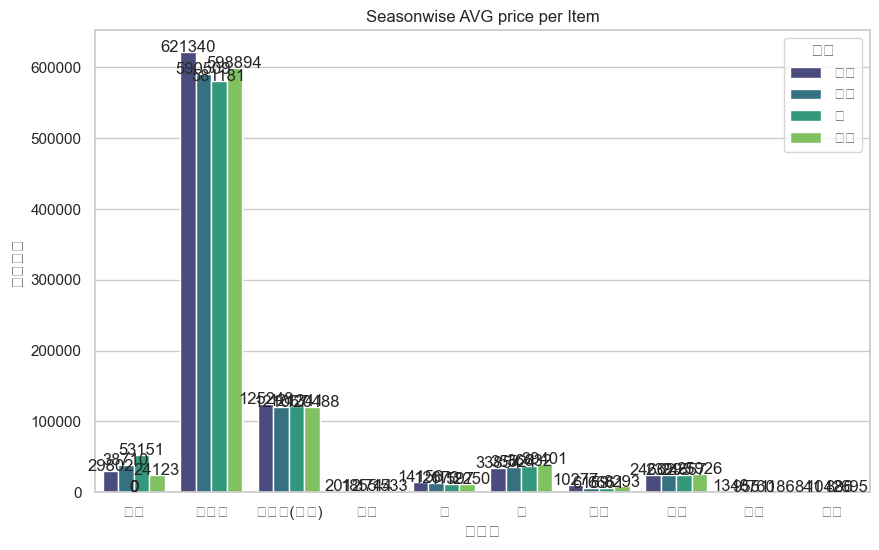

In [52]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

sns.barplot(
    data=season_avg_price,
    x = '품목명',
    y = '평균가격(원)',
    hue = '계절',
    palette='viridis'
)

plt.title('Seasonwise AVG price per Item')
plt.xlabel('품목명')
plt.ylabel('평균가격')

#make bars w values
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(
        p.get_x() + p.get_width() / 2,
        height + 50,
        f"{height:.0f}",
        ha='center'
    )

plt.legend(title='계절')
plt.show()

# 2. 결측치 제거

idea : 지역별 특산물 조사 후 해당 지역 공판장에서의 판매 금액만 이용하여 평년 평균가격/평균 가격의 0 대체 or 지역 상관 없이 평균 취해서 대체

In [53]:
meta_local = pd.read_csv('./open/train/meta/TRAIN_산지공판장_2018-2021.csv')
meta_whole = pd.read_csv('./open/train/meta/TRAIN_전국도매_2018-2021.csv')

In [54]:
# 파생변수
import numpy as np

for meta in [meta_local, meta_whole]: 
    meta['year'] = meta['시점'].str[:4].astype(int)
    meta['month'] = meta['시점'].str[4:6].astype(int)
    meta['순'] = meta['시점'].str[6:8]
    meta = meta[['year', 'month', '순'] + [col for col in meta.columns if col not in ['year', 'month', '순']]]

    def get_season(month):
        if month in [3, 4, 5]:
            return '봄'  
        elif month in [6, 7, 8]:
            return '여름'  
        elif month in [9, 10, 11]:
            return '가을'  
        elif month in [12, 1, 2]:
            return '겨울'  
        else:
            return np.nan 
    meta['계절'] = meta['month'].apply(get_season)
    meta['month'] = meta['month'].astype(int).astype(str).str.zfill(2)



C:\Users\min\AppData\Local\Temp\ipykernel_26644\2930621539.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\min\AppData\Local\Temp\ipykernel_26644\2930621539.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\min\AppData\Local\Temp\ipykernel_26644\2930621539.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [55]:
meta_whole.drop(['연도'], axis=1)
meta_local.drop(['연도'], axis=1)

meta_local
# 이거 연도 왜 안 사라져...

,시점,공판장코드,공판장명,품목코드,품목명,품종코드,품종명,등급코드,등급명,총반입량(kg),...,최고가(원/kg),경매 건수,전순 평균가격(원) PreVious SOON,전달 평균가격(원) PreVious MMonth,전년 평균가격(원) PreVious YeaR,평년 평균가격(원) Common Year SOON,연도,year,month,순
0,201801상순,1000000000,*전국농협공판장,501,감자,50101,수미,11,특,15470.0,...,2320.666667,7,1947.350427,1769.858320,1023.982379,0.000000,2018,2018,1,상순
1,201801상순,1000000000,*전국농협공판장,501,감자,50101,수미,12,상,2900.0,...,1417.857143,4,1301.239669,1348.253676,571.311475,0.000000,2018,2018,1,상순
2,201801상순,1000000000,*전국농협공판장,501,감자,50199,기타감자,13,보통,1320.0,...,911.875000,7,630.851064,449.166667,473.032787,0.000000,2018,2018,1,상순
3,201801상순,1000000000,*전국농협공판장,501,감자,50199,기타감자,12,상,460.0,...,1650.000000,5,1088.046875,1129.600000,734.024390,0.000000,2018,2018,1,상순
4,201801상순,1000000000,*전국농협공판장,501,감자,50199,기타감자,11,특,30967.0,...,2438.720588,8,2126.402457,1779.262728,1750.544700,0.000000,2018,2018,1,상순
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118623,202112하순,6198200402,서포농협(공판),1101,무,110199,기타무,11,특,30.0,...,700.000000,1,575.688073,720.252101,0.000000,0.000000,2021,2021,12,하순
118624,202112하순,6198200402,서포농협(공판),1202,대파,120201,대파(일반),11,특,632.0,...,2827.956989,29,2169.276585,2389.018191,4016.239316,0.000000,2021,2021,12,하순
118625,202112하순,6198200402,서포농협(공판),1209,마늘,120905,풋마늘,11,특,68.0,...,5700.000000,4,5319.665272,5052.083333,0.000000,0.000000,2021,2021,12,하순
118626,202112하순,6198200402,서포농협(공판),1209,마늘,120906,깐마늘,11,특,37.0,...,6408.484848,4,6314.285714,5795.156951,4651.111111,0.000000,2021,2021,12,하순


In [56]:
meta_local['공판장명'].unique()

array(['*전국농협공판장', '동두천농협공판장', '포천농협공판장', '제천농협공판장', '공주농협공판장',
       '논산계룡농협농산물공판장', '충서원협농산물공판장', '예산능금농협공판장', '군산원예농업협동조합', '전주농협공판장',
       '김제원예농업협동조합공판장', '남원원협공판장', '목포원예농업협동조합', '나주배농업협동조합', '대구공판장',
       '여수원예농협여천공판장', '여수원예농협농산물공판장', '왜관농협공판장', '경주농협 공판장',
       '영천농협농산물공판장간이지점', '대구경북능금농협영천공판장', '김천농협공판장', '상주농협공판장',
       '상주원예농협공판장', '점촌농협경제사업소', '풍기농협 백신<간>(판매)', '거창사과원예농협',
       '통영농협 농산물공판장', '동부농협 경매식집하장', '고성농협 공판장', '새통영농협 도산지점(공판)',
       '새남해농협경매식집하장', '새남해농협설천지점', '새남해농협남상지소', '새남해농협도마지점공판장(공판)',
       '새남해농협 중현지점', '창선농협(공판)', '동남해농협 남면지점(공판)', '동남해농협 삼동지점(공판)',
       '남해농협경매식집하장', '밀양농협공판장지점', '제주시농협농산물공판장', '서포농협(공판)',
       '삼천포농협농산물공판장', '의성농협농산물공판장(공판)', '동남해농협집하장(공판)', '남지농협공판장',
       '서생농협구동경매식집하장', '새남해농협서면지점경매식집하장', '동남해농협 미조지점(공판)',
       '동남해농협상주지점(공판)', '산청군농협 농산물산지유통센터(공판)', '새고성농협 하일지점(공판)',
       '동고성농협(공판)', '무안농업협동조합', '풍양농협 경매식집하장', '녹동농협농산물공판장', '대곡농협월아지점',
       '청도농협', '창녕농협공판장', '대관령원예농협공판사업소', '의성중부농협경매식집하장(공판)', '금성농협(공판)'

In [57]:
meta_local

,시점,공판장코드,공판장명,품목코드,품목명,품종코드,품종명,등급코드,등급명,총반입량(kg),...,최고가(원/kg),경매 건수,전순 평균가격(원) PreVious SOON,전달 평균가격(원) PreVious MMonth,전년 평균가격(원) PreVious YeaR,평년 평균가격(원) Common Year SOON,연도,year,month,순
0,201801상순,1000000000,*전국농협공판장,501,감자,50101,수미,11,특,15470.0,...,2320.666667,7,1947.350427,1769.858320,1023.982379,0.000000,2018,2018,1,상순
1,201801상순,1000000000,*전국농협공판장,501,감자,50101,수미,12,상,2900.0,...,1417.857143,4,1301.239669,1348.253676,571.311475,0.000000,2018,2018,1,상순
2,201801상순,1000000000,*전국농협공판장,501,감자,50199,기타감자,13,보통,1320.0,...,911.875000,7,630.851064,449.166667,473.032787,0.000000,2018,2018,1,상순
3,201801상순,1000000000,*전국농협공판장,501,감자,50199,기타감자,12,상,460.0,...,1650.000000,5,1088.046875,1129.600000,734.024390,0.000000,2018,2018,1,상순
4,201801상순,1000000000,*전국농협공판장,501,감자,50199,기타감자,11,특,30967.0,...,2438.720588,8,2126.402457,1779.262728,1750.544700,0.000000,2018,2018,1,상순
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118623,202112하순,6198200402,서포농협(공판),1101,무,110199,기타무,11,특,30.0,...,700.000000,1,575.688073,720.252101,0.000000,0.000000,2021,2021,12,하순
118624,202112하순,6198200402,서포농협(공판),1202,대파,120201,대파(일반),11,특,632.0,...,2827.956989,29,2169.276585,2389.018191,4016.239316,0.000000,2021,2021,12,하순
118625,202112하순,6198200402,서포농협(공판),1209,마늘,120905,풋마늘,11,특,68.0,...,5700.000000,4,5319.665272,5052.083333,0.000000,0.000000,2021,2021,12,하순
118626,202112하순,6198200402,서포농협(공판),1209,마늘,120906,깐마늘,11,특,37.0,...,6408.484848,4,6314.285714,5795.156951,4651.111111,0.000000,2021,2021,12,하순


In [58]:
variety_local =  meta_local.groupby('품목명')['품종명'].unique().reset_index()
for index, row in variety_local.iterrows():
    print(f"품목명: {row['품목명']}, 품종명: {row['품종명']}")

'''
감자 : 수미 -> 감자 수미
무 : all the same : aggregate
상추 : 청상추 -> 청
배추 :  all the same: : aggregate
마늘 : 깐마늘(국산) : change 품목명 and the variety: from 마늘 -> 깐마늘(국산)
양파: all the same : aggregate
건고추 : missing 

'''

품목명: 감자, 품종명: ['수미' '기타감자' '돼지감자' '자주감자' '대지' '남작' '조풍' '대서' '홍깨니백' '선농' '두백' '홍감자']
품목명: 대파, 품종명: ['기타대파' '깐대파' '중파' '대파(일반)']
품목명: 마늘, 품종명: ['저장형 난지' '마늘쫑(수입)' '마늘쫑' '깐마늘' '풋마늘' '기타마늘' '깐마늘(수입)' '육쪽마늘' '마늘(수입)'
 '햇마늘 난지' '저장형 한지' '햇마늘 한지' '햇마늘 대서' '햇마늘 남도' '깐마늘 남도' '깐마늘 한지' '저장형 대서'
 '저장형 남도' '깐마늘 대서']
품목명: 무, 품종명: ['다발무' '단무지무' '무말랭이' '기타무' '가을무' '저장무' '봄무' '여름무' '고냉지무']
품목명: 배, 품종명: ['신고' '금촌추' '추황' '감천' '기타배' '수황' '만수' '영산' '행수' '원황' '장수' '석정' '화산' '풍수'
 '황금' '장십랑' '예황' '신흥' '단배' '신수' '한아름' '만풍' '이십세기' '만삼길']
품목명: 배추, 품종명: ['월동배추' '기타배추' '우거지' '쌈배추' '저장배추' '김장(가을)배추' '봄배추' '생채용 배추' '여름배추' '고냉지배추'
 '절임배추']
품목명: 사과, 품종명: ['미시마' '미얀마' '로얄부사' '착색후지' '후지' '기꾸8' '기타사과' '감홍' '알프스오토메' '갈라' '스타크림숀'
 '산사' '왕령' '미야비' '아오리' '시나노스위트' '시나노레드' '맨코이' '홍로' '하향' '태양' '모리스' '추향'
 '추광' '화홍' '요까' '홍옥' '자홍' '조나골드' '천추' '홍월' '양광' '홍장군' '히로사끼' '야다까' '사이삼'
 '사과' '선홍' '아이카향' '서광' '세계일' '육오' '대홍' '소백3호']
품목명: 상추, 품종명: ['기타상추' '쫑상추' '상추순' '포기찹' '청상추' '적포기' '적상추' '꽃적상추' '청포기' '흑적']
품목명: 순무, 품종명: ['순무(일반)']
품목

'\n감자 : 수미 -> 감자 수미\n무 : all the same : aggregate\n상추 : 청상추 -> 청\n배추 :  all the same: : aggregate\n마늘 : 깐마늘(국산) : change 품목명 and the variety: from 마늘 -> 깐마늘(국산)\n양파: all the same : aggregate\n건고추 : missing \n\n'

In [59]:
variety_whole =  meta_whole.groupby('품목명')['품종명'].unique().reset_index()
for index, row in variety_whole.iterrows():
    print(f"품목명: {row['품목명']}, 품종명: {row['품종명']}")


품목명: 감자, 품종명: ['깐감자' '돼지감자' '자주감자' '가을감자' '기타감자' '봄감자' '조풍' '대지' '수미' '조림감자' '감자(수입)'
 '감자' '추백감자' '홍감자' '홍깨니백' '남작' '두백' '답리작' '선농' '대서' '고냉지' '얌빈(히카마)' '호박감자'
 '남서']
품목명: 대파, 품종명: ['중파' '대파(일반)' '깐대파' '대파(수입)' '대파' '기타대파']
품목명: 마늘, 품종명: ['햇마늘 한지' '햇마늘 난지' '깐마늘' '저장형 한지' '깐마늘(수입)' '마늘(수입)' '냉동마늘(수입)' '육쪽마늘'
 '마늘' '마늘쫑(수입)' '저장형 난지' '풋마늘' '주대마늘' '기타마늘' '마늘쫑' '쪽마늘' '깐마늘 대서' '깐마늘 한지'
 '햇마늘 남도' '깐마늘 남도' '햇마늘 대서' '저장형 대서' '저장형 남도']
품목명: 무, 품종명: ['여름무' '무솎음' '가을무' '고냉지무' '무말랭이(수입)' '단무지무' '건무(수입)' '월동무' '저장무' '소궁기무'
 '무' '기타무' '다발무' '세척무' '무말랭이' '달랑무' '봄무' '자색무' '무(수입)']
품목명: 배, 품종명: ['금촌추' '추황' '감천' '배' '신고' '기타배' '황금' '만수' '신흥' '단배' '만삼길' '수황' '행수' '장수'
 '화산' '군총' '석정' '신천' '원황' '선황' '한아름' '신수' '풍수' '장십랑' '만풍' '이십세기' '애감수'
 '영산' '시원' '신화' '창조']
품목명: 배추, 품종명: ['우거지' '봄배추' '생채용 배추' '배추' '김장(가을)배추' '절임배추' '저장배추' '고냉지배추' '월동배추' '여름배추'
 '배추뿌리' '쌈배추' '기타배추' '배추(수입)' '우거지(수입)' '배양채']
품목명: 사과, 품종명: ['로얄부사' '미야비' '챔피온' '로얄후지' '스타칼라' '착색후지' '사과' '기꾸8' '알프스오토메' '산사' '후지'
 '미시마' '미얀마' '기타사과' '홍옥' '감홍

In [60]:
unique_var_loacl = meta_local['품종명'].unique().tolist()
filter_var = []
for criterion in filter_criteria:
    if isinstance(criterion['품종명'], list):
        filter_var.extend(criterion['품종명'])
    else:
        filter_var.append(criterion['품종명'])

missing_varieties = set(filter_var) - set(unique_var_loacl)

if missing_varieties:
    print("Missing 품종명 in meta_local dataset:", missing_varieties)
else:
    print("All 품종명 in filter criteria are present in meta_local dataset.")

Missing 품종명 in meta_local dataset: {'화건', '깐마늘(국산)', '무', '청', '감자 수미', '배추', '양파'}


Before filtering local data by criterion data, I found unmatched names
### matching names _ local data -> output : filtered_local

'''
- 감자 : 수미 -> 감자 수미 
- 무 : all the same : change all the 무 품종 except for 단무지무, 무말랭이, 다발무 to 무
- 상추 : 청상추 -> 청
- 배추 :  all the same: change all the 배추 품종 except for 절임배추 to 배추
- 마늘 : 깐마늘(국산) : change 품목명 and the variety: from 마늘 -> 깐마늘(국산)
- 양파: all the same : 양파(일반) to 양파
- 건고추 : missing 
'''

In [61]:
cleaned_meta_local = meta_local.copy()

# 감자
cleaned_meta_local.loc[
    (cleaned_meta_local['품목명'] == '감자') & (cleaned_meta_local['품종명'] == '수미'), '품종명'
] = '감자 수미'

# 상주
cleaned_meta_local.loc[
    (cleaned_meta_local['품목명'] == '상추') & (cleaned_meta_local['품종명'] == '청상추'), '품종명' 
] = '청'

# 마늘
garlic = cleaned_meta_local['품목명'] == '마늘'
cleaned_meta_local.loc[garlic, '품목명'] = '깐마늘(국산)'
cleaned_meta_local.loc[garlic, '품종명'] = '깐마늘(국산)'

# 양파
cleaned_meta_local.loc[
    (cleaned_meta_local['품목명'] == '양파') & (cleaned_meta_local['품종명'] == '양파(일반)'),'품종명'
                       ] = '양파'

# 무
rad_exp = ['단무지무', '무말랭이', '다발무']
cleaned_meta_local.loc[
    (cleaned_meta_local['품목명'] == '무') & (~cleaned_meta_local['품종명'].isin(rad_exp)), '품종명'
] = '무'

# 배추
rad_exp = ['절임배추', '기타배추', '우거지']
cleaned_meta_local.loc[
    (cleaned_meta_local['품목명'] == '배추') & (~cleaned_meta_local['품종명'].isin(rad_exp)), '품종명'
] = '배추'


In [62]:
cleaned_meta_local

,시점,공판장코드,공판장명,품목코드,품목명,품종코드,품종명,등급코드,등급명,총반입량(kg),...,최고가(원/kg),경매 건수,전순 평균가격(원) PreVious SOON,전달 평균가격(원) PreVious MMonth,전년 평균가격(원) PreVious YeaR,평년 평균가격(원) Common Year SOON,연도,year,month,순
0,201801상순,1000000000,*전국농협공판장,501,감자,50101,감자 수미,11,특,15470.0,...,2320.666667,7,1947.350427,1769.858320,1023.982379,0.000000,2018,2018,1,상순
1,201801상순,1000000000,*전국농협공판장,501,감자,50101,감자 수미,12,상,2900.0,...,1417.857143,4,1301.239669,1348.253676,571.311475,0.000000,2018,2018,1,상순
2,201801상순,1000000000,*전국농협공판장,501,감자,50199,기타감자,13,보통,1320.0,...,911.875000,7,630.851064,449.166667,473.032787,0.000000,2018,2018,1,상순
3,201801상순,1000000000,*전국농협공판장,501,감자,50199,기타감자,12,상,460.0,...,1650.000000,5,1088.046875,1129.600000,734.024390,0.000000,2018,2018,1,상순
4,201801상순,1000000000,*전국농협공판장,501,감자,50199,기타감자,11,특,30967.0,...,2438.720588,8,2126.402457,1779.262728,1750.544700,0.000000,2018,2018,1,상순
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118623,202112하순,6198200402,서포농협(공판),1101,무,110199,무,11,특,30.0,...,700.000000,1,575.688073,720.252101,0.000000,0.000000,2021,2021,12,하순
118624,202112하순,6198200402,서포농협(공판),1202,대파,120201,대파(일반),11,특,632.0,...,2827.956989,29,2169.276585,2389.018191,4016.239316,0.000000,2021,2021,12,하순
118625,202112하순,6198200402,서포농협(공판),1209,깐마늘(국산),120905,깐마늘(국산),11,특,68.0,...,5700.000000,4,5319.665272,5052.083333,0.000000,0.000000,2021,2021,12,하순
118626,202112하순,6198200402,서포농협(공판),1209,깐마늘(국산),120906,깐마늘(국산),11,특,37.0,...,6408.484848,4,6314.285714,5795.156951,4651.111111,0.000000,2021,2021,12,하순


In [63]:
mask_local = pd.Series([False]*len(cleaned_meta_local))

for criterion in filter_criteria:
    condition = (cleaned_meta_local['품목명'] == criterion['품목명'])
    if isinstance(criterion['품종명'], list):
        condition &= cleaned_meta_local['품종명'].isin(criterion['품종명'])
    else:
        condition &= (cleaned_meta_local['품종명'] == criterion['품종명'])

    mask_local |= condition

filtered_local = cleaned_meta_local[mask_local].copy()

In [64]:
filtered_local

,시점,공판장코드,공판장명,품목코드,품목명,품종코드,품종명,등급코드,등급명,총반입량(kg),...,최고가(원/kg),경매 건수,전순 평균가격(원) PreVious SOON,전달 평균가격(원) PreVious MMonth,전년 평균가격(원) PreVious YeaR,평년 평균가격(원) Common Year SOON,연도,year,month,순
0,201801상순,1000000000,*전국농협공판장,501,감자,50101,감자 수미,11,특,15470.0,...,2320.666667,7,1947.350427,1769.858320,1023.982379,0.0,2018,2018,1,상순
1,201801상순,1000000000,*전국농협공판장,501,감자,50101,감자 수미,12,상,2900.0,...,1417.857143,4,1301.239669,1348.253676,571.311475,0.0,2018,2018,1,상순
10,201801상순,1000000000,*전국농협공판장,501,감자,50101,감자 수미,10,.,40930.0,...,2500.000000,5,1662.417582,1729.009786,1482.098275,0.0,2018,2018,1,상순
14,201801상순,1000000000,*전국농협공판장,501,감자,50101,감자 수미,19,등외,520.0,...,940.000000,4,729.941860,245.833333,263.571429,0.0,2018,2018,1,상순
15,201801상순,1000000000,*전국농협공판장,501,감자,50101,감자 수미,13,보통,1080.0,...,1382.352941,4,777.073801,440.909091,377.640000,0.0,2018,2018,1,상순
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118620,202112하순,6198200402,서포농협(공판),501,감자,50101,감자 수미,11,특,3.0,...,13066.666667,3,0.000000,2104.545455,0.000000,0.0,2021,2021,12,하순
118623,202112하순,6198200402,서포농협(공판),1101,무,110199,무,11,특,30.0,...,700.000000,1,575.688073,720.252101,0.000000,0.0,2021,2021,12,하순
118624,202112하순,6198200402,서포농협(공판),1202,대파,120201,대파(일반),11,특,632.0,...,2827.956989,29,2169.276585,2389.018191,4016.239316,0.0,2021,2021,12,하순
118625,202112하순,6198200402,서포농협(공판),1209,깐마늘(국산),120905,깐마늘(국산),11,특,68.0,...,5700.000000,4,5319.665272,5052.083333,0.000000,0.0,2021,2021,12,하순


In [65]:
present_items = filtered_local['품목명'].unique().tolist()
print(present_items)

['감자', '사과', '배', '배추', '상추', '무', '대파', '깐마늘(국산)', '양파']


## 1-1) 데이터로 지역별 특산물 파악


Missing 품목명 in filtered data: {'건고추'}


C:\Users\min\AppData\Local\Temp\ipykernel_26644\3550000721.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


a:\UNI\website\Prediction-of-Agricultural-Product-prices\agri-prediction\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.

a:\UNI\website\Prediction-of-Agricultural-Product-prices\agri-prediction\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.

a:\UNI\website\Prediction-of-Agricultural-Product-prices\agri-prediction\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from current font.

a:\UNI\website\Prediction-of-Agricultural-Product-prices\agri-prediction\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyp

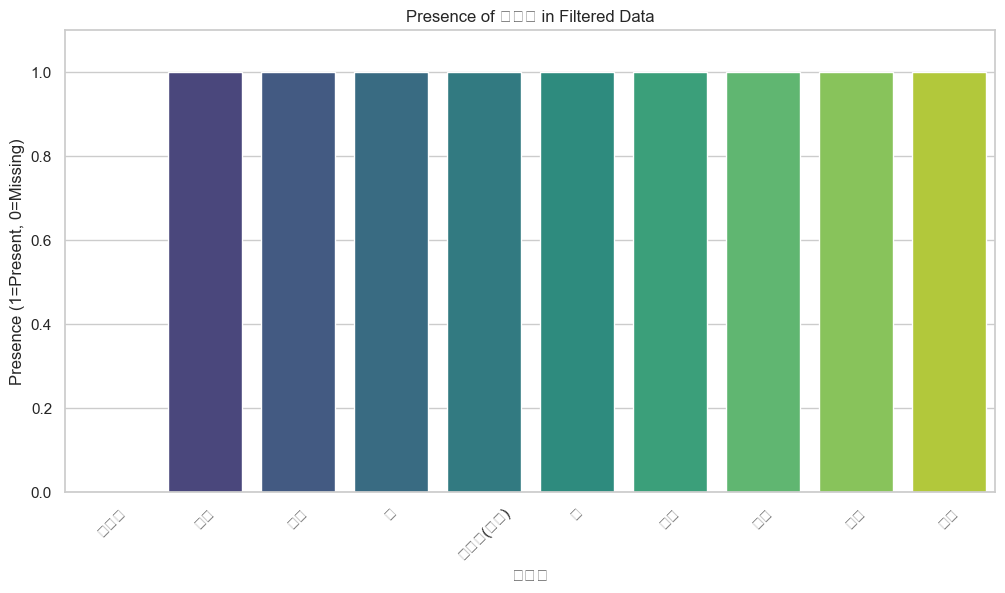

In [66]:
# Extract the list of expected 품목명 from filter criteria
expected_items = [criterion['품목명'] for criterion in filter_criteria]
# Get unique 품목명 present in the filtered data
present_items = filtered_local['품목명'].unique().tolist()
# Identify missing 품목명
missing_items = set(expected_items) - set(present_items)

if missing_items:
    print("\nMissing 품목명 in filtered data:", missing_items)
else:
    print("\nAll 품목명 from the criteria are present in the filtered data.")

import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame indicating presence
presence_df = pd.DataFrame({
    '품목명': expected_items,
    'Present': [item in present_items for item in expected_items]
})



plt.figure(figsize=(12, 6))
sns.barplot(x='품목명', y='Present', data=presence_df, palette='viridis')
plt.xlabel('품목명')
plt.ylabel('Presence (1=Present, 0=Missing)')
plt.title('Presence of 품목명 in Filtered Data')
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.show()



In [67]:
#!pip install plotly

In [68]:
# aggregating year-month
filtered_local['YearMonth'] = filtered_local['year'].astype(str) +'-'+  filtered_local['month'].astype(str).str.zfill(2)

In [69]:
filtered_local

,시점,공판장코드,공판장명,품목코드,품목명,품종코드,품종명,등급코드,등급명,총반입량(kg),...,경매 건수,전순 평균가격(원) PreVious SOON,전달 평균가격(원) PreVious MMonth,전년 평균가격(원) PreVious YeaR,평년 평균가격(원) Common Year SOON,연도,year,month,순,YearMonth
0,201801상순,1000000000,*전국농협공판장,501,감자,50101,감자 수미,11,특,15470.0,...,7,1947.350427,1769.858320,1023.982379,0.0,2018,2018,1,상순,2018-01
1,201801상순,1000000000,*전국농협공판장,501,감자,50101,감자 수미,12,상,2900.0,...,4,1301.239669,1348.253676,571.311475,0.0,2018,2018,1,상순,2018-01
10,201801상순,1000000000,*전국농협공판장,501,감자,50101,감자 수미,10,.,40930.0,...,5,1662.417582,1729.009786,1482.098275,0.0,2018,2018,1,상순,2018-01
14,201801상순,1000000000,*전국농협공판장,501,감자,50101,감자 수미,19,등외,520.0,...,4,729.941860,245.833333,263.571429,0.0,2018,2018,1,상순,2018-01
15,201801상순,1000000000,*전국농협공판장,501,감자,50101,감자 수미,13,보통,1080.0,...,4,777.073801,440.909091,377.640000,0.0,2018,2018,1,상순,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118620,202112하순,6198200402,서포농협(공판),501,감자,50101,감자 수미,11,특,3.0,...,3,0.000000,2104.545455,0.000000,0.0,2021,2021,12,하순,2021-12
118623,202112하순,6198200402,서포농협(공판),1101,무,110199,무,11,특,30.0,...,1,575.688073,720.252101,0.000000,0.0,2021,2021,12,하순,2021-12
118624,202112하순,6198200402,서포농협(공판),1202,대파,120201,대파(일반),11,특,632.0,...,29,2169.276585,2389.018191,4016.239316,0.0,2021,2021,12,하순,2021-12
118625,202112하순,6198200402,서포농협(공판),1209,깐마늘(국산),120905,깐마늘(국산),11,특,68.0,...,4,5319.665272,5052.083333,0.000000,0.0,2021,2021,12,하순,2021-12


In [70]:
# data aggregation
filtered_local['YearMonth'] = pd.to_datetime(filtered_local['YearMonth'], format='%Y-%m')
grouped = filtered_local.groupby(['YearMonth', '품목명', '공판장명']).agg({'경매 건수': 'sum'}).reset_index()

all_items = grouped.groupby(['YearMonth', '공판장명']).agg({'경매 건수': 'sum'}).reset_index()
all_items['품목명'] = 'All Items'

all_auc = grouped.groupby(['YearMonth', '품목명']).agg({'경매 건수': 'sum'}).reset_index()
all_auc['공판장명'] = 'All Auction Sites'

all_combined = grouped.groupby('YearMonth').agg({'경매 건수': 'sum'}).reset_index()
all_combined['품목명'] = 'All Items'
all_combined['공판장명'] = 'All Auction Sites'

combined = pd.concat([grouped, all_items, all_auc, all_combined], ignore_index=True)



In [71]:
import plotly.graph_objects as go
import pandas as pd

# Assuming 'combined' is your DataFrame
# Ensure 'YearMonth' is in datetime format for proper sorting and plotting
combined['YearMonth'] = pd.to_datetime(combined['YearMonth'])

# Get unique lists
courts = combined['공판장명'].unique()
items = combined['품목명'].unique()

# Initialize the figure
fig = go.Figure()

# Add a trace for each court (aggregated across all items)
for court in courts:
    # Filter data for the court
    df_filtered = combined[combined['공판장명'] == court]
    
    # Aggregate auction counts by YearMonth
    df_agg = df_filtered.groupby('YearMonth')['경매 건수'].sum().reset_index()
    
    # Add trace
    fig.add_trace(
        go.Scatter(
            x=df_agg['YearMonth'],
            y=df_agg['경매 건수'],
            mode='lines+markers',
            name=f'{court}',
            visible=True,  # All traces visible by default
            hovertemplate='Year-Month: %{x|%Y-%m}<br>Auction Count: %{y}<extra></extra>'
        )
    )

# Define dropdown buttons for 공판장명 (Courts)
court_buttons = [
    dict(
        label=court,
        method='update',
        args=[
            {'visible': [trace.name == court for trace in fig.data]},
            {'title': f'월별 경매 건수 추이 - {court}'}
        ]
    ) for court in courts
]

# Add a button for "All Courts" which shows all traces
court_buttons.insert(0, dict(
    label='All Courts',
    method='update',
    args=[
        {'visible': [True] * len(fig.data)},  # Show all traces
        {'title': '월별 경매 건수 추이 - All Courts'}
    ]
))

# Add dropdown menus to the layout
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=court_buttons,
            x=1.05,
            y=0.95,
            xanchor='left',
            yanchor='top',
            showactive=True,
            direction='down',
            pad={'r': 10, 't': 10},
            name='Court Selector'
        )
    ],
    title='월별 경매 건수 추이 - All Courts',
    xaxis_title='Year-Month',
    yaxis_title='Auction Count',
    xaxis=dict(
        tickformat="%Y-%m",
        dtick="M1",
        tickangle=-45
    ),
    hovermode='x unified',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    )
)

fig.show()


In [72]:
spe_data = combined[
    (combined['품목명'] != 'All Items') &
    (combined['공판장명'] != 'All Auction Sites')
]

agg_df = spe_data.groupby(['품목명', '공판장명'])['경매 건수'].sum().reset_index()
top_auc = agg_df.loc[agg_df.groupby('품목명')['경매 건수'].idxmax()].copy()
top_auc['Top'] = True

top_auc

,품목명,공판장명,경매 건수,Top
27,감자,제천농협공판장,21318,True
75,깐마늘(국산),이방농협,122660,True
92,대파,군산원예농업협동조합,19866,True
163,무,제천농협공판장,13098,True
177,배,나주배농업협동조합,51215,True
229,배추,제천농협공판장,24514,True
246,사과,대구공판장,90257,True
287,상추,제주시농협농산물공판장,40664,True
297,양파,대구공판장,2844,True


## 1-2) 전국 공판장 거래 가격 파악

In [73]:
meta_whole.drop(['연도'], axis=1)

,시점,시장코드,시장명,품목코드,품목명,품종코드,품종명,총반입량(kg),총거래금액(원),평균가(원/kg),...,최저가(원/kg),최고가(원/kg),경매 건수,전순 평균가격(원) PreVious SOON,전달 평균가격(원) PreVious MMonth,전년 평균가격(원) PreVious YeaR,평년 평균가격(원) Common Year SOON,year,month,순
0,201801상순,100000,*전국도매시장,501,감자,50124,깐감자,20.0,86520,4326.000000,...,4326.0,4326.000000,1,0.000000,4009.000000,0.000000,0.000000,2018,1,상순
1,201801상순,100000,*전국도매시장,501,감자,50121,돼지감자,12380.0,11650810,941.099354,...,200.0,3000.000000,117,11213.358450,9174.196723,8167.895632,0.000000,2018,1,상순
2,201801상순,100000,*전국도매시장,501,감자,50110,자주감자,240.0,158400,660.000000,...,500.0,1000.000000,7,12553.279352,12612.216445,24990.324897,18483.961304,2018,1,상순
3,201801상순,100000,*전국도매시장,501,감자,50111,가을감자,10.0,37500,3750.000000,...,3700.0,3800.000000,2,24929.463415,40365.081269,0.000000,0.000000,2018,1,상순
4,201801상순,100000,*전국도매시장,501,감자,50199,기타감자,1367301.3,2403199462,1757.622451,...,0.0,10581.081081,872,30806.779529,27661.150770,23741.953223,19340.121989,2018,1,상순
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176009,202112하순,380401,진주,1202,대파,120201,대파(일반),21897.5,33837005,1545.245119,...,500.0,3879.125000,39,1348.646801,1261.828668,2400.044348,2026.635189,2021,12,하순
176010,202112하순,380401,진주,1209,마늘,120942,깐마늘 대서,3250.0,15000000,4615.384615,...,4000.0,5000.000000,2,0.000000,4615.384615,0.000000,0.000000,2021,12,하순
176011,202112하순,380401,진주,1209,마늘,120943,깐마늘 남도,9250.0,45000000,4864.864865,...,4000.0,5000.000000,3,0.000000,4864.864865,0.000000,0.000000,2021,12,하순
176012,202112하순,380401,진주,1209,마늘,120999,기타마늘,130.0,464000,3569.230769,...,2400.0,4000.000000,4,0.000000,5823.076923,2604.166667,0.000000,2021,12,하순


### matching names -> output: filtered_whole

In [74]:
for index, row in variety_whole.iterrows():
    print(f"품목명: {row['품목명']}, 품종명: {row['품종명']}")

품목명: 감자, 품종명: ['깐감자' '돼지감자' '자주감자' '가을감자' '기타감자' '봄감자' '조풍' '대지' '수미' '조림감자' '감자(수입)'
 '감자' '추백감자' '홍감자' '홍깨니백' '남작' '두백' '답리작' '선농' '대서' '고냉지' '얌빈(히카마)' '호박감자'
 '남서']
품목명: 대파, 품종명: ['중파' '대파(일반)' '깐대파' '대파(수입)' '대파' '기타대파']
품목명: 마늘, 품종명: ['햇마늘 한지' '햇마늘 난지' '깐마늘' '저장형 한지' '깐마늘(수입)' '마늘(수입)' '냉동마늘(수입)' '육쪽마늘'
 '마늘' '마늘쫑(수입)' '저장형 난지' '풋마늘' '주대마늘' '기타마늘' '마늘쫑' '쪽마늘' '깐마늘 대서' '깐마늘 한지'
 '햇마늘 남도' '깐마늘 남도' '햇마늘 대서' '저장형 대서' '저장형 남도']
품목명: 무, 품종명: ['여름무' '무솎음' '가을무' '고냉지무' '무말랭이(수입)' '단무지무' '건무(수입)' '월동무' '저장무' '소궁기무'
 '무' '기타무' '다발무' '세척무' '무말랭이' '달랑무' '봄무' '자색무' '무(수입)']
품목명: 배, 품종명: ['금촌추' '추황' '감천' '배' '신고' '기타배' '황금' '만수' '신흥' '단배' '만삼길' '수황' '행수' '장수'
 '화산' '군총' '석정' '신천' '원황' '선황' '한아름' '신수' '풍수' '장십랑' '만풍' '이십세기' '애감수'
 '영산' '시원' '신화' '창조']
품목명: 배추, 품종명: ['우거지' '봄배추' '생채용 배추' '배추' '김장(가을)배추' '절임배추' '저장배추' '고냉지배추' '월동배추' '여름배추'
 '배추뿌리' '쌈배추' '기타배추' '배추(수입)' '우거지(수입)' '배양채']
품목명: 사과, 품종명: ['로얄부사' '미야비' '챔피온' '로얄후지' '스타칼라' '착색후지' '사과' '기꾸8' '알프스오토메' '산사' '후지'
 '미시마' '미얀마' '기타사과' '홍옥' '감홍

In [75]:
unique_var_whole = meta_whole['품종명'].unique().tolist()
filter_var = []
for criterion in filter_criteria:
    if isinstance(criterion['품종명'], list):
        filter_var.extend(criterion['품종명'])
    else:
        filter_var.append(criterion['품종명'])

missing_varieties = set(filter_var) - set(unique_var_whole)

if missing_varieties:
    print("Missing 품종명 in meta_local dataset:", missing_varieties)
else:
    print("All 품종명 in filter criteria are present in meta_local dataset.")

Missing 품종명 in meta_local dataset: {'깐마늘(국산)', '감자 수미', '화건', '청'}


In [76]:
cleaned_meta_whole = meta_whole.copy()

# 감자
cleaned_meta_whole.loc[
    (cleaned_meta_whole['품목명'] == '감자') & (cleaned_meta_whole['품종명'] == '수미'), '품종명'
] = '감자 수미'

# 상추
cleaned_meta_whole.loc[
    (cleaned_meta_whole['품목명'] == '상추') & (cleaned_meta_whole['품종명'] == '청상추'), '품종명' 
] = '청'

# 마늘
garlic = cleaned_meta_whole['품목명'] == '마늘'
garlic_inc = ['깐마늘 대서', '깐마늘 한지']
cleaned_meta_whole.loc[garlic, '품목명'] = '깐마늘(국산)'
cleaned_meta_whole.loc[(garlic) & (cleaned_meta_whole['품종명'].isin(garlic_inc)),'품종명'] = '깐마늘(국산)'

# 화건 건고추는 데이터 없음


In [77]:
unique_var_whole = cleaned_meta_whole['품종명'].unique().tolist()
filter_var_2 = []
for criterion in filter_criteria:
    if isinstance(criterion['품종명'], list):
        filter_var_2.extend(criterion['품종명'])
    else:
        filter_var_2.append(criterion['품종명'])

missing_varieties_2 = set(filter_var_2) - set(unique_var_whole)

if missing_varieties_2:
    print("Missing 품종명 in meta_local dataset:", missing_varieties_2)
else:
    print("All 품종명 in filter criteria are present in meta_local dataset.")

Missing 품종명 in meta_local dataset: {'화건'}


In [78]:
mask_whole = pd.Series([False]*len(cleaned_meta_whole))

for criterion in filter_criteria:
    condition_w = (cleaned_meta_whole['품목명'] == criterion['품목명'])
    if isinstance(criterion['품종명'], list):
        condition_w &= cleaned_meta_whole['품종명'].isin(criterion['품종명'])
    else:
        condition_w &= (cleaned_meta_whole['품종명'] == criterion['품종명'])

    mask_whole |= condition_w

filtered_whole = cleaned_meta_whole[mask_whole].copy()

In [79]:
filtered_whole

,시점,시장코드,시장명,품목코드,품목명,품종코드,품종명,총반입량(kg),총거래금액(원),평균가(원/kg),...,최고가(원/kg),경매 건수,전순 평균가격(원) PreVious SOON,전달 평균가격(원) PreVious MMonth,전년 평균가격(원) PreVious YeaR,평년 평균가격(원) Common Year SOON,연도,year,month,순
8,201801상순,100000,*전국도매시장,501,감자,50101,감자 수미,2423696.5,4135898623,1706.442462,...,9859.633333,1229,168039.623201,27204.818622,22433.563798,18536.038912,2018,2018,1,상순
23,201801상순,100000,*전국도매시장,601,사과,60103,후지,4421982.3,8056837500,1821.996777,...,6750.000000,4983,20489.828672,19563.378717,21379.550547,29947.583478,2018,2018,1,상순
33,201801상순,100000,*전국도매시장,602,배,60201,신고,2680166.6,4084693940,1524.044789,...,800000.000000,2029,18465.266753,17279.726937,21448.886213,25700.530909,2018,2018,1,상순
38,201801상순,100000,*전국도매시장,1001,배추,100100,배추,169366.0,74920580,442.359033,...,950.000000,74,0.000000,0.000000,0.000000,0.000000,2018,2018,1,상순
53,201801상순,100000,*전국도매시장,1005,상추,100501,청,279687.2,1021613704,3652.700960,...,10000.000000,1446,14079.078027,5426.843900,6863.550198,18533.910588,2018,2018,1,상순
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175990,202112하순,380401,진주,601,사과,60103,후지,68870.0,175281900,2545.112531,...,4515.000000,142,2636.057808,2606.690192,3424.540130,6745.053448,2021,2021,12,하순
175993,202112하순,380401,진주,602,배,60201,신고,48580.0,99593000,2050.082338,...,2889.743590,111,2148.729792,2012.721253,3212.826620,7714.715769,2021,2021,12,하순
176003,202112하순,380401,진주,1005,상추,100501,청,1024.0,2544146,2484.517578,...,11200.000000,36,2254.687253,3102.522112,2175.838170,0.000000,2021,2021,12,하순
176009,202112하순,380401,진주,1202,대파,120201,대파(일반),21897.5,33837005,1545.245119,...,3879.125000,39,1348.646801,1261.828668,2400.044348,2026.635189,2021,2021,12,하순


In [80]:
present_items_w = filtered_whole['품목명'].unique().tolist()
print(present_items_w)

['감자', '사과', '배', '배추', '상추', '무', '양파', '대파', '깐마늘(국산)']


### 전국 거래 공판장 데이터 eda

In [81]:
count_pro_var = filtered_whole.groupby(['품목명', '품종명']).size().reset_index(name='counts')
product_counts = filtered_whole.groupby('품목명').size().reset_index(name='product counts')
print(count_pro_var)
print(product_counts)

       품목명      품종명  counts
0       감자    감자 수미    4228
1  깐마늘(국산)  깐마늘(국산)     741
2       대파   대파(일반)    4613
3        무        무     594
4        배       신고    4650
5       배추       배추     841
6       사과       홍로    1253
7       사과       후지    4438
8       상추        청    4607
9       양파       양파     646
       품목명  product counts
0       감자            4228
1  깐마늘(국산)             741
2       대파            4613
3        무             594
4        배            4650
5       배추             841
6       사과            5691
7       상추            4607
8       양파             646


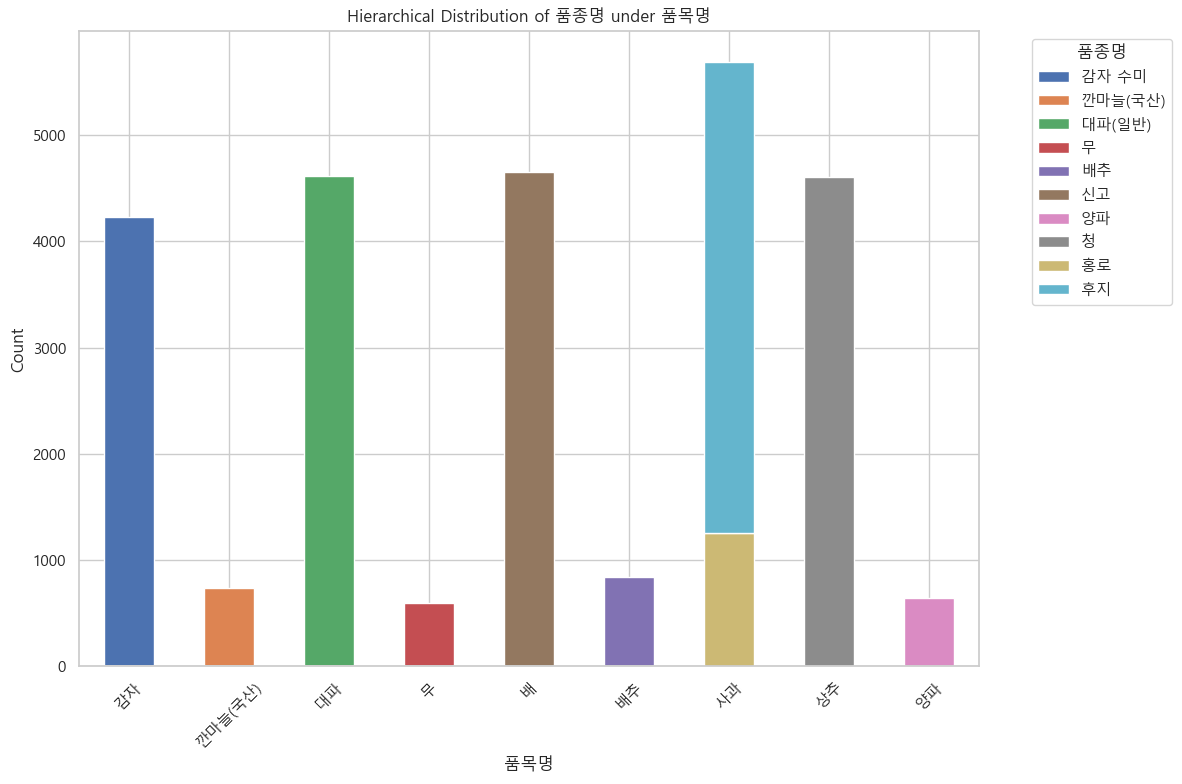

In [82]:
plt.rcParams['font.family'] ='Malgun Gothic'
pivot_count = count_pro_var.pivot(index='품목명', columns='품종명', values='counts')
pivot_count.plot(kind='bar', stacked=True, figsize=(12,8))

plt.title('Hierarchical Distribution of 품종명 under 품목명')
plt.ylabel('Count')
plt.xlabel('품목명')
plt.xticks(rotation=45)
plt.legend(title='품종명', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [83]:
columns_list = ["전순 평균가격(원) PreVious SOON", "전달 평균가격(원) PreVious MMonth", "전년 평균가격(원) PreVious YeaR", "평년 평균가격(원) Common Year SOON", '평균가(원/kg)']
zero_columns = (filtered_whole[columns_list] == 0)
zero_columns['품목명'] = filtered_whole['품목명']
zero_columns['품종명'] = filtered_whole['품종명']

zero_columns_grouped = zero_columns.groupby(['품목명', '품종명']).sum()
print("Number of zero entries for each column, grouped by '품목명' and '품종명':")
zero_columns_grouped

Number of zero entries for each column, grouped by '품목명' and '품종명':


전순 평균가격(원) PreVious SOON  전달 평균가격(원) PreVious MMonth  \
품목명     품종명                                                             
감자      감자 수미                         130                         160   
깐마늘(국산) 깐마늘(국산)                        92                         151   
대파      대파(일반)                          8                          13   
무       무                              36                          53   
배       신고                             80                         101   
배추      배추                             55                          87   
사과      홍로                            189                         424   
        후지                            144                         233   
상추      청                              14                          17   
양파      양파                             41                          63   

                 전년 평균가격(원) PreVious YeaR  평년 평균가격(원) Common Year SOON  \
품목명     품종명                                                              
감자      감자 수미                         268                         1268   
깐마늘(국산) 깐마늘(국산)                       741                          741   
대파      대파(일반)                         44                          318   
무       무                             239                          594   
배       신고                             92                          616   
배추      배추                            339                          841   
사과      홍로                            161                          336   
        후지                            218                          800   
상추      청                              66                          534   
양파      양파                            262                          646   

                 평균가(원/kg)  
품목명     품종명                 
감자      감자 수미            0  
깐마늘(국산) 깐마늘(국산)          0  
대파      대파(일반)           0  
무       무                0  
배       신고               0  
배추      배추               0  
사과      홍로               2  
        후지               0  
상추      청                0  
양파      양파               0

## 1-3) 결측치 채우기

In [84]:
filtered_df

,year,month,순,시점,품목명,품종명,거래단위,등급,평년 평균가격(원),평균가격(원),계절
0,2018,01,상순,201801상순,건고추,화건,30 kg,상품,381666.666667,590000.000000,겨울
1,2018,01,중순,201801중순,건고추,화건,30 kg,상품,380809.666667,590000.000000,겨울
2,2018,01,하순,201801하순,건고추,화건,30 kg,상품,380000.000000,590000.000000,겨울
3,2018,02,상순,201802상순,건고추,화건,30 kg,상품,380000.000000,590000.000000,겨울
4,2018,02,중순,201802중순,건고추,화건,30 kg,상품,376666.666667,590000.000000,겨울
...,...,...,...,...,...,...,...,...,...,...,...
26491,2021,11,중순,202111중순,대파,대파(일반),1키로단,상,1934.819444,1754.222222,가을
26492,2021,11,하순,202111하순,대파,대파(일반),1키로단,상,1774.898148,1460.250000,가을
26493,2021,12,상순,202112상순,대파,대파(일반),1키로단,상,1728.379630,1619.000000,겨울
26494,2021,12,중순,202112중순,대파,대파(일반),1키로단,상,1677.643519,1217.125000,겨울


In [85]:
#필터링 후 놓친 것 있는지 확인
unique_var = filtered_df['품종명'].unique().tolist()
filter_var_3 = []
for criterion in filter_criteria:
    if isinstance(criterion['품종명'], list):
        filter_var_3.extend(criterion['품종명'])
    else:
        filter_var_3.append(criterion['품종명'])

missing_varieties_3 = set(filter_var_3) - set(unique_var)

if missing_varieties_3:
    print("Missing 품종명 in filtered_df dataset:", missing_varieties_3)
else:
    print("All 품종명 in filter criteria are present in filtered_df dataset.")

All 품종명 in filter criteria are present in filtered_df dataset.


In [86]:
#결측치 확인
import pandas as pd

columns_check = ['평년 평균가격(원)', '평균가격(원)']

zero_counts = (filtered_df[columns_check] == 0).sum(axis=1)
nan_counts = filtered_df[columns_check].isna().sum(axis=1)
counts_df = pd.DataFrame({
    '품목명': filtered_df['품목명'],
    '품종명': filtered_df['품종명'],
    'zero_count': zero_counts,
    'nan_count': nan_counts
})

grouped_counts = counts_df.groupby(['품목명', '품종명']).sum()

grouped_counts


zero_count  nan_count
품목명     품종명                           
감자      감자 수미             0          0
건고추     화건                2          0
깐마늘(국산) 깐마늘(국산)         144          0
대파      대파(일반)            0          0
무       무               144          0
배       신고                0          0
배추      배추                0          0
사과      홍로                0          0
        후지                5          0
상추      청                 0          0
양파      양파                0          0

In [87]:
filtered_garlic = filtered_df[(filtered_df['품목명'] == "건고추") & (filtered_df['품종명'] == "화건")]
print(filtered_garlic.shape[0])
# seems like 마늘 and 무 are all empty, 사과 후지 few
# every data has 144 entries

144


### train data eda

In [88]:
import math
from matplotlib.ticker import MaxNLocator
import plotly.graph_objects as go
from plotly.subplots import make_subplots

unique_items = filtered_df['품목명'].unique()
for item in unique_items:
    item_data = filtered_df[filtered_df['품목명'] == item]
    unique_combinations = item_data[['품종명', '등급']].drop_duplicates()
    num_combinations = len(unique_combinations)
    
    cols = 2
    rows = math.ceil(num_combinations / cols)
    
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=[f"{variety} ({grade})" for variety, grade in unique_combinations.itertuples(index=False)])
    
    for idx, (variety, grade) in enumerate(unique_combinations.itertuples(index=False)):
        row = idx // cols + 1
        col = idx % cols + 1
        combination_data = item_data[
            (item_data['품종명'] == variety) &
            (item_data['등급'] == grade)
        ].dropna(subset=['평년 평균가격(원)', '평균가격(원)', '시점']).sort_values('시점')
        
        fig.add_trace(
            go.Scatter(x=combination_data['시점'], y=combination_data['평년 평균가격(원)'],
                       mode='lines+markers', name='평년 평균가격(원)', line=dict(color='blue')),
            row=row, col=col
        )
        
        fig.add_trace(
            go.Scatter(x=combination_data['시점'], y=combination_data['평균가격(원)'],
                       mode='lines+markers', name='평균가격(원)', line=dict(color='green')),
            row=row, col=col
        )
    
    fig.update_layout(title_text=f"{item} - 가격 추이", showlegend=True)
    fig.update_xaxes(tickangle=45)
    fig.show()
    
    # (Optional) Save the plot as HTML
    # fig.write_html(f"{item}_가격추이.html")


### 결측치 제거
* train data에 평년평균값이 빠져 있음 <br>
How ? <br>
1. 전국도매 데이터를 우선적으로 사용
 - 평년 평균가격이 있으면 그것 사용
 - 없으면: 지금으로부터 3-4년 (데이터 결측치에 따라) 평균 내서 계산

2. 전국도매 데이터를 사용하기 어려우면, 산지 공판장 데이터 사용
- 동일

In [89]:
filtered_df[filtered_df['품목명'] == '무'] #20kg 상자
filtered_df[filtered_df['품목명'] == '깐마늘(국산)'] #20kg
filtered_df[filtered_df['품목명'] == '건고추'] #30kg
filtered_df[filtered_df['품목명'] == '사과'] #10개 사과 1개 305g # 우선 일괄적으로 무게 곱하고 다른 데이터 값과 비교 후 조정 

,year,month,순,시점,품목명,품종명,거래단위,등급,평년 평균가격(원),평균가격(원),계절
1152,2018,01,상순,201801상순,사과,후지,10 개,상품,21461.666667,20361.0,겨울
1153,2018,01,중순,201801중순,사과,후지,10 개,상품,22179.666667,20359.0,겨울
1154,2018,01,하순,201801하순,사과,후지,10 개,상품,22917.666667,20653.0,겨울
1155,2018,02,상순,201802상순,사과,후지,10 개,상품,23424.666667,20563.0,겨울
1156,2018,02,중순,201802중순,사과,후지,10 개,상품,23201.666667,21779.0,겨울
...,...,...,...,...,...,...,...,...,...,...,...
1291,2021,11,중순,202111중순,사과,후지,10 개,상품,20743.666667,26004.0,가을
1292,2021,11,하순,202111하순,사과,후지,10 개,상품,20673.000000,25494.0,가을
1293,2021,12,상순,202112상순,사과,후지,10 개,상품,20539.666667,26144.0,겨울
1294,2021,12,중순,202112중순,사과,후지,10 개,상품,20197.000000,26177.0,겨울


In [91]:
# 사과

filtered_df_backup = filtered_df.copy()

# Filter for '사과' and '후지'
apple_fuji_df = filtered_df[
    (filtered_df['품목명'] == '사과') &
    (filtered_df['품종명'] == '후지')
].copy()


zero_mask = apple_fuji_df['평년 평균가격(원)'] == 0

print(f"Number of zero '평년 평균가격(원)' entries for '사과'/'후지': {zero_mask.sum()}")
print("Zero entries:")
print(apple_fuji_df[zero_mask][['품목명', '품종명', '시점', 'year', '평년 평균가격(원)', '거래단위']])


apple_fuji_df.sort_values(by=['시점', 'year'], inplace=True)


Number of zero '평년 평균가격(원)' entries for '사과'/'후지': 5
Zero entries:
     품목명 품종명        시점  year  평년 평균가격(원)  거래단위
1176  사과  후지  201809상순  2018         0.0  10 개
1181  사과  후지  201810하순  2018         0.0  10 개
1212  사과  후지  201909상순  2019         0.0  10 개
1217  사과  후지  201910하순  2019         0.0  10 개
1253  사과  후지  202010하순  2020         0.0  10 개


In [92]:
# Replace zero '평년 평균가격(원)' with NaN
filtered_df.loc[
    (filtered_df['품목명'] == '사과') &
    (filtered_df['품종명'] == '후지') &
    (filtered_df['평년 평균가격(원)'] == 0),
    '평년 평균가격(원)'
] = np.nan


In [93]:
#verify
zero_remaining = filtered_df[
    (filtered_df['품목명'] == '사과') &
    (filtered_df['품종명'] == '후지') &
    (filtered_df['평년 평균가격(원)'] == 0)
]

print(f"Number of remaining zero '평년 평균가격(원)' entries for '사과'/'후지': {len(zero_remaining)}")

if len(zero_remaining) == 0:
    print("All zero '평년 평균가격(원)' entries have been successfully replaced with NaN.")
else:
    print("Some zero '평년 평균가격(원)' entries remain:")
    print(zero_remaining[['품목명', '품종명', '시점', 'year', '평년 평균가격(원)', '거래단위']])


Number of remaining zero '평년 평균가격(원)' entries for '사과'/'후지': 0
All zero '평년 평균가격(원)' entries have been successfully replaced with NaN.


In [94]:
# Sort the DataFrame by '시점' and 'year'
apple_fuji_df = filtered_df[
    (filtered_df['품목명'] == '사과') &
    (filtered_df['품종명'] == '후지')
].copy()

apple_fuji_df.sort_values(by=['시점', 'year'], inplace=True)


In [95]:
#apply smoothing
from statsmodels.nonparametric.smoothers_lowess import lowess
import warnings

# Suppress specific warnings if desired (use with caution)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Define a function to apply LOESS safely
def apply_loess_safe(group, frac=0.3):
    if group['평년 평균가격(원)'].isna().all():
        # If all values are missing, return as is
        return group['평년 평균가격(원)']
    try:
        # Apply LOESS smoothing
        smoothed = lowess(
            endog=group['평년 평균가격(원)'],
            exog=group['year'],
            frac=frac,
            return_sorted=False
        )
        return smoothed
    except Exception as e:
        print(f"Error smoothing group '{group.name}': {e}")
        # Return original values if smoothing fails
        return group['평년 평균가격(원)']

# Apply LOESS smoothing within each '시점'
apple_fuji_df['평년 평균가격(원)_smoothed'] = apple_fuji_df.groupby('시점').apply(
    lambda grp: apply_loess_safe(grp, frac=0.3)
).reset_index(level=0, drop=True)


In [96]:
#apply smoothing
from statsmodels.nonparametric.smoothers_lowess import lowess
import warnings

# Suppress specific warnings if desired
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Define a safe LOESS function
def apply_loess_safe(group, frac=0.3):
    if group['평년 평균가격(원)'].isna().all():
        return group['평년 평균가격(원)']
    try:
        smoothed = lowess(
            endog=group['평년 평균가격(원)'],
            exog=group['year'],
            frac=frac,
            return_sorted=False
        )
        return smoothed
    except Exception as e:
        print(f"Error smoothing group '{group.name}': {e}")
        return group['평년 평균가격(원)']

# Apply LOESS smoothing within each '시점'
apple_fuji_df['평년 평균가격(원)_smoothed'] = apple_fuji_df.groupby('시점').apply(
    lambda grp: apply_loess_safe(grp)
).reset_index(level=0, drop=True)

# Verify the smoothing
print("Smoothed values:")
print(apple_fuji_df[['품목명', '품종명', '시점', 'year', '평년 평균가격(원)', '평년 평균가격(원)_smoothed']].head())


Smoothed values:
     품목명 품종명        시점  year    평년 평균가격(원) 평년 평균가격(원)_smoothed
1152  사과  후지  201801상순  2018  21461.666667                 NaN
1153  사과  후지  201801중순  2018  22179.666667                 NaN
1154  사과  후지  201801하순  2018  22917.666667                 NaN
1155  사과  후지  201802상순  2018  23424.666667                 NaN
1156  사과  후지  201802중순  2018  23201.666667                 NaN


In [ ]:
# Create a temporary DataFrame with '시점' and 'year' as identifiers
smoothed_values = apple_fuji_df[['시점', 'year', '평년 평균가격(원)_smoothed']]

# Merge smoothed values back to 'filtered_df' based on '시점' and 'year'
filtered_df = filtered_df.merge(
    smoothed_values,
    on=['시점', 'year'],
    how='left'
)

# Identify the missing entries in 'filtered_df' for '사과'/'후지'
missing_mask = (
    (filtered_df['품목명'] == '사과') &
    (filtered_df['품종명'] == '후지') &
    (filtered_df['평년 평균가격(원)'].isna())
)

print(f"Number of missing '평년 평균가격(원)' after initial filling: {missing_mask.sum()}")

# Assign smoothed values to the missing entries
filtered_df.loc[missing_mask, '평년 평균가격(원)'] = filtered_df.loc[missing_mask, '평년 평균가격(원)_smoothed']

# Drop the temporary smoothed column
filtered_df.drop(columns=['평년 평균가격(원)_smoothed'], inplace=True)

# Verify the assignment
print("Updated '평년 평균가격(원)' for '사과'/'후지' after smoothing:")
print(filtered_df[
    (filtered_df['품목명'] == '사과') &
    (filtered_df['품종명'] == '후지')
][['품목명', '품종명', '시점', 'year', '평년 평균가격(원)', 'fill_source']])


In [98]:
# Extract smoothed values with identifiers
smoothed_values = apple_fuji_df[['시점', 'year', '평년 평균가격(원)_smoothed']]

# Merge smoothed values back to 'filtered_df' based on '시점' and 'year'
filtered_df = filtered_df.merge(
    smoothed_values,
    on=['시점', 'year'],
    how='left'
)

# Identify the missing entries in 'filtered_df' for '사과'/'후지'
missing_mask = (
    (filtered_df['품목명'] == '사과') &
    (filtered_df['품종명'] == '후지') &
    (filtered_df['평년 평균가격(원)'].isna())
)

print(f"Number of missing '평년 평균가격(원)' after initial filling: {missing_mask.sum()}")

# Assign smoothed values to the missing entries
filtered_df.loc[missing_mask, '평년 평균가격(원)'] = filtered_df.loc[missing_mask, '평년 평균가격(원)_smoothed']

# Drop the temporary smoothed column
filtered_df.drop(columns=['평년 평균가격(원)_smoothed'], inplace=True)

# Verify the assignment
print("Updated '평년 평균가격(원)' for '사과'/'후지' after smoothing:")
print(filtered_df[
    (filtered_df['품목명'] == '사과') &
    (filtered_df['품종명'] == '후지')
][['품목명', '품종명', '시점', 'year', '평년 평균가격(원)']])



Number of missing '평년 평균가격(원)' after initial filling: 5
Updated '평년 평균가격(원)' for '사과'/'후지' after smoothing:
    품목명 품종명        시점  year    평년 평균가격(원)
144  사과  후지  201801상순  2018  21461.666667
145  사과  후지  201801중순  2018  22179.666667
146  사과  후지  201801하순  2018  22917.666667
147  사과  후지  201802상순  2018  23424.666667
148  사과  후지  201802중순  2018  23201.666667
..   ..  ..       ...   ...           ...
283  사과  후지  202111중순  2021  20743.666667
284  사과  후지  202111하순  2021       20673.0
285  사과  후지  202112상순  2021  20539.666667
286  사과  후지  202112중순  2021       20197.0
287  사과  후지  202112하순  2021  20237.333333

[125 rows x 5 columns]


In [100]:
filtered_whole.columns

Index(['시점', '시장코드', '시장명', '품목코드', '품목명', '품종코드', '품종명', '총반입량(kg)',
       '총거래금액(원)', '평균가(원/kg)', '고가(20%) 평균가', '중가(60%) 평균가 ', '저가(20%) 평균가',
       '중간가(원/kg)', '최저가(원/kg)', '최고가(원/kg)', '경매 건수',
       '전순 평균가격(원) PreVious SOON', '전달 평균가격(원) PreVious MMonth',
       '전년 평균가격(원) PreVious YeaR', '평년 평균가격(원) Common Year SOON', '연도', 'year',
       'month', '순'],
      dtype='object')

In [101]:
#얼만큼 0인지 recheck
mask_zero_in_filtered_df = filtered_df['평년 평균가격(원)'] == 0
print(f"Total zero entries in '평년 평균가격(원)': {mask_zero_in_filtered_df.sum()}")



Total zero entries in '평년 평균가격(원)': 290


In [102]:
# Rename columns for clarity
filtered_whole = filtered_whole.rename(columns={
    '평년 평균가격(원) Common Year SOON': '평년 평균가격(원)_whole'
})


n_rows_df = len(filtered_df)
print(f"Number of rows before merging with filtered_whole: {n_rows_df}")

# due to the duplicated rows
# Aggregate filtered_whole by the merge keys, taking the mean of the other columns
filtered_whole_agg = filtered_whole.groupby(['품목명', '품종명', '시점', 'year']).agg({
    '평년 평균가격(원)_whole': 'mean'
}).reset_index()

# Merge filtered_df with filtered_whole on specified keys
merged_df = filtered_df.merge(
    filtered_whole_agg[['품목명', '품종명', '시점', 'year', '평년 평균가격(원)_whole']],
    on=['품목명', '품종명', '시점', 'year'],
    how='left'
)

# Check the number of rows after merging
n_rows_merged_df = len(merged_df)
print(f"Number of rows after merging with filtered_whole: {n_rows_merged_df}")

merged_df.head()


Number of rows before merging with filtered_whole: 1440
Number of rows after merging with filtered_whole: 1440


,year,month,순,시점,품목명,품종명,거래단위,등급,평년 평균가격(원),평균가격(원),계절,평년 평균가격(원)_whole
0,2018,01,상순,201801상순,건고추,화건,30 kg,상품,381666.666667,590000.0,겨울,NaN
1,2018,01,중순,201801중순,건고추,화건,30 kg,상품,380809.666667,590000.0,겨울,NaN
2,2018,01,하순,201801하순,건고추,화건,30 kg,상품,380000.0,590000.0,겨울,NaN
3,2018,02,상순,201802상순,건고추,화건,30 kg,상품,380000.0,590000.0,겨울,NaN
4,2018,02,중순,201802중순,건고추,화건,30 kg,상품,376666.666667,590000.0,겨울,NaN


In [103]:
#거래 단위 filtering
merged_df['거래단위_num'] = merged_df['거래단위'].str.extract(r'(\d+\.?\d*)').astype(float)

print("Sample of '거래단위' and '거래단위_num':")
print(merged_df[['거래단위', '거래단위_num']].head())

Sample of '거래단위' and '거래단위_num':
    거래단위  거래단위_num
0  30 kg      30.0
1  30 kg      30.0
2  30 kg      30.0
3  30 kg      30.0
4  30 kg      30.0


In [104]:
# 전체 공판장 값으로 씌우기
mask_zero = (merged_df['평년 평균가격(원)'] == 0)
mask_whole_available = (
    merged_df['평년 평균가격(원)_whole'].notna() &
    (merged_df['평년 평균가격(원)_whole'] != 0) &
    merged_df['거래단위_num'].notna()  # 거래단위 validation
)
mask_to_fill_with_whole = mask_zero & mask_whole_available

number_to_fill_with_whole = mask_to_fill_with_whole.sum()
print(f"Number of rows to fill with '_whole' data: {number_to_fill_with_whole}")

#fill
merged_df.loc[mask_to_fill_with_whole, '평년 평균가격(원)'] = (
    merged_df.loc[mask_to_fill_with_whole, '평년 평균가격(원)_whole'] *
    merged_df.loc[mask_to_fill_with_whole, '거래단위_num']
)

# validation
remaining_zeros_after_whole = (merged_df['평년 평균가격(원)'] == 0).sum()
print(f"Number of zeros remaining after filling with '_whole' data: {remaining_zeros_after_whole}")




Number of rows to fill with '_whole' data: 0
Number of zeros remaining after filling with '_whole' data: 290


In [105]:
# 전국 공판장 가로 채울애들
filtered_local = filtered_local.rename(columns={
    '평년 평균가격(원) Common Year SOON': '평년 평균가격(원)_local'
})
filtered_local_agg = filtered_local.groupby(['품목명', '품종명', '시점', 'year']).agg({
    '평년 평균가격(원)_local': 'mean'
}).reset_index()



In [106]:
#local 값으로 채우기
# Merge merged_df with filtered_local_agg on the same keys
merged_df = merged_df.merge(
    filtered_local_agg,
    on=['품목명', '품종명', '시점', 'year'],
    how='left'
)

# Check the number of rows after merging
n_rows_after_local_merge = len(merged_df)
print(f"Number of rows after merging with filtered_local_agg: {n_rows_after_local_merge}")



Number of rows after merging with filtered_local_agg: 1440


In [108]:
# 평균으로 채워 넣기
# 현재시점보다 절댓값 3년 기준
wwindow_size = 3

def calculate_time_windowed_mean_multiplied(row, df, window=3):
    품목 = row['품목명']
    품종 = row['품종명']
    시점 = row['시점']
    year = row['year']
    거래단위 = row['거래단위_num']
    
    start_year = year - window
    end_year = year + window

    window_df = df[
        (df['품목명'] == 품목) &
        (df['품종명'] == 품종) &
        (df['시점'] == 시점) &
        (df['year'] >= start_year) &
        (df['year'] <= end_year)
    ]
    mean_val = window_df['평균가격(원)'].replace(0, np.nan).mean()
    
    if pd.isna(mean_val):
        return np.nan
    else:
        return mean_val * 거래단위  # Multiply by '거래단위_num'

# identify where to fill
mask_zero_after_local = (merged_df['평년 평균가격(원)'] == 0)

# calculate each mean
time_windowed_means_multiplied = merged_df[mask_zero_after_local].apply(
    lambda row: calculate_time_windowed_mean_multiplied(row, merged_df, window=3), axis=1
)

#filling
merged_df.loc[mask_zero_after_local, 'mean_평균가격(원)_multiplied'] = time_windowed_means_multiplied
mask_to_fill_with_mean_multiplied = (
    (merged_df['평년 평균가격(원)'] == 0) &
    (merged_df['mean_평균가격(원)_multiplied'].notna())
)

number_to_fill_with_mean_multiplied = mask_to_fill_with_mean_multiplied.sum()
print(f"Number of rows to fill with time-windowed mean * 거래단위_num: {number_to_fill_with_mean_multiplied}")

# Fill '평년 평균가격(원)' with the multiplied mean
merged_df.loc[mask_to_fill_with_mean_multiplied, '평년 평균가격(원)'] = (
    merged_df.loc[mask_to_fill_with_mean_multiplied, 'mean_평균가격(원)_multiplied']
)

Number of rows to fill with time-windowed mean: 218
Number of zeros remaining after all replacements: 0


In [109]:
# validating 

merged_df['fill_source'] = np.where(
    merged_df['평년 평균가격(원)'] == merged_df['평년 평균가격(원)_whole'], 
    'whole', 
    np.where(
        merged_df['평년 평균가격(원)'] == merged_df['평년 평균가격(원)_local'], 
        'local', 
        np.where(
            merged_df['평년 평균가격(원)'] == merged_df['mean_평균가격(원)_multiplied'], 
            'average', 
            'original'  # If no filling was done, it's the original value
        )
    )
)

merged_df[['품목명', '품종명', '시점', 'year', '평년 평균가격(원)', 'fill_source']].to_csv('merged_output.csv', index=False)



In [110]:
#얼만큼 0인지 recheck
mask_zero_in_filtered_df = merged_df['평년 평균가격(원)'] == 0
print(f"Total zero entries in '평년 평균가격(원)': {mask_zero_in_filtered_df.sum()}")

Total zero entries in '평년 평균가격(원)': 0


In [115]:
filtered_display = merged_df[merged_df['품목명'].isin(['깐마늘(국산)', '무(상)'])]
filtered_display[['품목명', '품종명', '시점', 'year', '평년 평균가격(원)', 'fill_source']]
filtered_display.to_csv('garlicRadish.csv')

In [112]:
merged_df[(merged_df['품목명'] == '사과') & (merged_df['품종명'] == '후지')].to_csv('apple')


In [113]:
import math
from matplotlib.ticker import MaxNLocator
import plotly.graph_objects as go
from plotly.subplots import make_subplots

unique_items = merged_df['품목명'].unique()
for item in unique_items:
    item_data = merged_df[merged_df['품목명'] == item]
    unique_combinations = item_data[['품종명', '등급']].drop_duplicates()
    num_combinations = len(unique_combinations)
    
    cols = 2
    rows = math.ceil(num_combinations / cols)
    
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=[f"{variety} ({grade})" for variety, grade in unique_combinations.itertuples(index=False)])
    
    for idx, (variety, grade) in enumerate(unique_combinations.itertuples(index=False)):
        row = idx // cols + 1
        col = idx % cols + 1
        combination_data = item_data[
            (item_data['품종명'] == variety) &
            (item_data['등급'] == grade)
        ].dropna(subset=['평년 평균가격(원)', '평균가격(원)', '시점']).sort_values('시점')
        
        fig.add_trace(
            go.Scatter(x=combination_data['시점'], y=combination_data['평년 평균가격(원)'],
                       mode='lines+markers', name='평년 평균가격(원)', line=dict(color='blue')),
            row=row, col=col
        )
        
        fig.add_trace(
            go.Scatter(x=combination_data['시점'], y=combination_data['평균가격(원)'],
                       mode='lines+markers', name='평균가격(원)', line=dict(color='green')),
            row=row, col=col
        )
    
    fig.update_layout(title_text=f"{item} - 가격 추이", showlegend=True)
    fig.update_xaxes(tickangle=45)
    fig.show()
    
    # (Optional) Save the plot as HTML
    # fig.write_html(f"{item}_가격추이.html")
